In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('test_data_2.xlsx')

In [3]:
data = np.array([
    list(df.iloc[i]) for i in range(len(df))
])

In [27]:
unique_data = np.unique(data, axis=0)
len(unique_data)

78

In [29]:
np.sum(unique_data, axis=0)

array([38, 39, 38, 40, 39, 39, 40])

In [30]:
np.sum(unique_data, axis=1)

array([3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4,
       4, 5, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4,
       3, 4, 4, 5, 3, 4, 4, 5, 5, 5, 6, 2, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5,
       4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 6, 4])

In [31]:
np.unique(np.sum(unique_data, axis=1))

array([1, 2, 3, 4, 5, 6])

Что мы имеем: из 240 векторов 78 уникальных, единичек и нулей в них в среднем поровну, вектора не состоят только из 0 или 1.

Так как наши вектора бинарные, довольно странно делать кластеризацию на основе расстояний между ними.
Значит понизим размерность и избавимся от бинарности

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


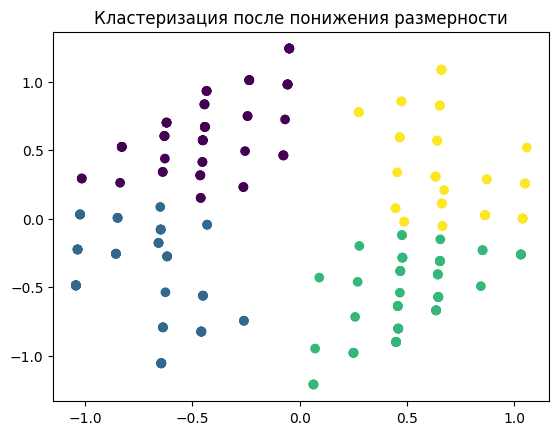

In [61]:
pca = PCA(n_components=2)
data_2 = pd.DataFrame(pca.fit_transform(data))

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_2)
clusters = kmeans.labels_

plt.title('Кластеризация после понижения размерности')
plt.scatter(data_2[0], data_2[1], c=clusters)
plt.show()

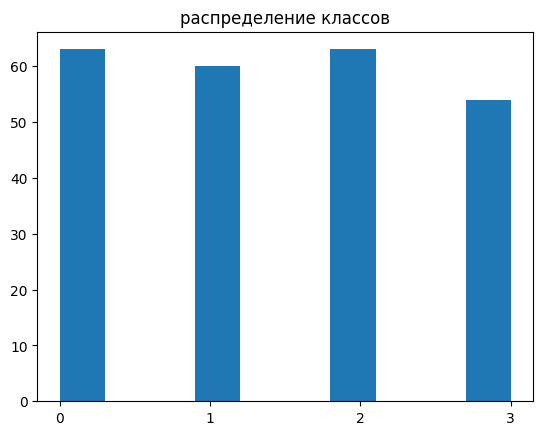

In [63]:
plt.title('распределение классов')
plt.hist(clusters)
plt.xticks([0,1,2,3])
plt.show()

In [68]:
for j in range(4):
    print(f'средняя сумма вектора в классе {j} = \
    {np.sum([ (np.sum(data[i]) if clusters[i] == 2 else 0) for i in range(len(data)) ]) / np.sum([i == j for i in clusters])}')

средняя сумма вектора в классе 0 =     3.126984126984127
средняя сумма вектора в классе 1 =     3.283333333333333
средняя сумма вектора в классе 2 =     3.126984126984127
средняя сумма вектора в классе 3 =     3.6481481481481484


мы разбили наши вектора на 4 класса практически поровну, при этом суммы векторов в них примерно равны, значит кластеризация произошла на основе порядка единиц и нулей